# 0. Setup Paths

In [4]:
import os

In [5]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [6]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [7]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [6]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [6]:
paths

{'WORKSPACE_PATH': 'Tensorflow\\workspace',
 'SCRIPTS_PATH': 'Tensorflow\\scripts',
 'APIMODEL_PATH': 'Tensorflow\\models',
 'ANNOTATION_PATH': 'Tensorflow\\workspace\\annotations',
 'IMAGE_PATH': 'Tensorflow\\workspace\\images',
 'MODEL_PATH': 'Tensorflow\\workspace\\models',
 'PRETRAINED_MODEL_PATH': 'Tensorflow\\workspace\\pre-trained-models',
 'CHECKPOINT_PATH': 'Tensorflow\\workspace\\models\\my_ssd_mobnet',
 'OUTPUT_PATH': 'Tensorflow\\workspace\\models\\my_ssd_mobnet\\export',
 'TFJS_PATH': 'Tensorflow\\workspace\\models\\my_ssd_mobnet\\tfjsexport',
 'TFLITE_PATH': 'Tensorflow\\workspace\\models\\my_ssd_mobnet\\tfliteexport',
 'PROTOC_PATH': 'Tensorflow\\protoc'}

In [7]:
files

{'PIPELINE_CONFIG': 'Tensorflow\\workspace\\models\\my_ssd_mobnet\\pipeline.config',
 'TF_RECORD_SCRIPT': 'Tensorflow\\scripts\\generate_tfrecord.py',
 'LABELMAP': 'Tensorflow\\workspace\\annotations\\label_map.pbtxt'}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [6]:
# https://www.tensorflow.org/install/source_windows

In [5]:
if os.name=='nt':
#     !pip install wget
    import wget

In [11]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Cloning into 'Tensorflow\models'...
Updating files:  62% (1581/2549)
Updating files:  63% (1606/2549)
Updating files:  64% (1632/2549)
Updating files:  65% (1657/2549)
Updating files:  66% (1683/2549)
Updating files:  67% (1708/2549)
Updating files:  68% (1734/2549)
Updating files:  69% (1759/2549)
Updating files:  70% (1785/2549)
Updating files:  71% (1810/2549)
Updating files:  72% (1836/2549)
Updating files:  73% (1861/2549)
Updating files:  74% (1887/2549)
Updating files:  75% (1912/2549)
Updating files:  76% (1938/2549)
Updating files:  77% (1963/2549)
Updating files:  78% (1989/2549)
Updating files:  79% (2014/2549)
Updating files:  80% (2040/2549)
Updating files:  81% (2065/2549)
Updating files:  82% (2091/2549)
Updating files:  83% (2116/2549)
Updating files:  84% (2142/2549)
Updating files:  85% (2167/2549)
Updating files:  86% (2193/2549)
Updating files:  87% (2218/2549)
Updating files:  88% (2244/2549)
Updating files:  89% (2269/2549)
Updating files:  90% (2295/2549)
Updatin

In [12]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [44]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

 97% [.......................................................................   ] 1425408 / 1468733

100% [..........................................................................] 1468733 / 1468733        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying obj

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-39: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-39: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-39: module MAY be using inspect.stack
C:\Users\Asus\AppData\Local\Temp\easy_install-m7zfywhv\apache-beam-2.31.0rc1\setup.py:257: UserWarning: This version of Apache Beam has not been sufficiently tested on Python 3.9. You may encounter bugs or missing features.
  warnings.warn(
D:\Coding\myrepos\Computer-Vision\cvenv\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\Asus\AppData\Local\Temp\easy_install-m7zfywhv\apache-beam-2.31.0rc1\apache_beam\coders\coder_impl.pxd
  tree = Parsing.p_module(s, pxd, full_module_name)
D:\Coding\myrepos\Computer-Vision\cvenv\lib\site-pack


copying object_detection\protos\ssd_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\string_int_label_map_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\target_assigner_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\train_pb2.py -> build\lib\object_detection\protos
running egg_info
writing object_detection.egg-info\PKG-INFO
writing dependency_links to object_detection.egg-info\dependency_links.txt
writing requirements to object_detection.egg-info\requires.txt
writing top-level names to object_detection.egg-info\top_level.txt
reading manifest file 'object_detection.egg-info\SOURCES.txt'
writing manifest file 'object_detection.egg-info\SOURCES.txt'
running install
running bdist_egg
running egg_info
writing object_detection.egg-info\PKG-INFO
writing dependency_links to object_detection.egg-info\dependency_links.txt
writing requirements to object_detection.egg-info\requires.txt
writing top-level names to 

Obtaining file:///D:/Coding/myrepos/Computer-Vision/Tensorflow/models/research/slim
  Attempting uninstall: slim
    Found existing installation: slim 0.1
    Uninstalling slim-0.1:
      Successfully uninstalled slim-0.1
  Running setup.py develop for slim


In [47]:
paths['PROTOC_PATH']

'Tensorflow\\protoc'

In [21]:
!python -m pip install matplotlib

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires Cython, which is not installed.
tf-models-official 2.5.0 requires Cython, which is not installed.
tf-models-official 2.5.0 requires gin-config, which is not installed.
tf-models-official 2.5.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.5.0 requires google-cloud-bigquery>=0.31.0, which is not installed.
tf-models-official 2.5.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.5.0 requires oauth2client, which is not installed.
tf-models-official 2.5.0 requires opencv-python-headless, which is not installed.
tf-models-official

In [25]:
!pip install pyyaml

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.5.0 requires Cython, which is not installed.
tf-models-official 2.5.0 requires gin-config, which is not installed.
tf-models-official 2.5.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.5.0 requires google-cloud-bigquery>=0.31.0, which is not installed.
tf-models-official 2.5.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.5.0 requires oauth2client, which is not installed.
tf-models-official 2.5.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.5.0 requires psutil>=5.4.3, which is not installed.
tf-models-official 2.5.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.5.0 requires sacrebleu, which is not installed.
tf-models-official 2.5.0 requires sentencepiece, which is not i

In [10]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2021-07-08 12:21:06.957768: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cudart64_110.dll
Running tests under Python 3.9.5: D:\Coding\myrepos\Computer-Vision\cvenv\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-07-08 12:21:45.916249: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library nvcuda.dll
2021-07-08 12:21:46.132645: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1650 computeCapability: 7.5
coreClock: 1.56GHz coreCount: 16 deviceMemorySize: 4.00GiB deviceMemoryBandwidth: 119.24GiB/s
2021-07-08 12:21:46.141523: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cudart64_110.dll
2021-07-08 12:21:47.265341: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cublas

INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_faster_rcnn_models_from_config_mask_rcnn_with_matmul): 0.11s
I0708 12:22:05.006931  9904 test_util.py:2102] time(__main__.ModelBuilderTF2Test.test_create_faster_rcnn_models_from_config_mask_rcnn_with_matmul): 0.11s
[       OK ] ModelBuilderTF2Test.test_create_faster_rcnn_models_from_config_mask_rcnn_with_matmul
[ RUN      ] ModelBuilderTF2Test.test_create_faster_rcnn_models_from_config_mask_rcnn_without_matmul
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_faster_rcnn_models_from_config_mask_rcnn_without_matmul): 0.23s
I0708 12:22:05.235934  9904 test_util.py:2102] time(__main__.ModelBuilderTF2Test.test_create_faster_rcnn_models_from_config_mask_rcnn_without_matmul): 0.23s
[       OK ] ModelBuilderTF2Test.test_create_faster_rcnn_models_from_config_mask_rcnn_without_matmul
[ RUN      ] ModelBuilderTF2Test.test_create_rfcn_model_from_config
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_rfcn_model

I0708 12:22:10.088855  9904 efficientnet_model.py:147] round_filter input=40 output=48
I0708 12:22:10.088855  9904 efficientnet_model.py:147] round_filter input=80 output=88
I0708 12:22:10.479855  9904 efficientnet_model.py:147] round_filter input=80 output=88
I0708 12:22:10.479855  9904 efficientnet_model.py:147] round_filter input=112 output=120
I0708 12:22:10.824855  9904 efficientnet_model.py:147] round_filter input=112 output=120
I0708 12:22:10.824855  9904 efficientnet_model.py:147] round_filter input=192 output=208
I0708 12:22:11.270875  9904 efficientnet_model.py:147] round_filter input=192 output=208
I0708 12:22:11.270875  9904 efficientnet_model.py:147] round_filter input=320 output=352
I0708 12:22:11.496860  9904 efficientnet_model.py:147] round_filter input=1280 output=1408
I0708 12:22:11.551867  9904 efficientnet_model.py:458] Building model efficientnet with params ModelConfig(width_coefficient=1.1, depth_coefficient=1.2, resolution=260, dropout_rate=0.3, blocks=(BlockCon

In [23]:
!pip install tensorflow --upgrade

In [19]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.17.3
Uninstalling protobuf-3.17.3:
  Successfully uninstalled protobuf-3.17.3


  Using cached protobuf-3.17.3-cp39-cp39-win_amd64.whl (909 kB)
  Running setup.py clean for matplotlib
Failed to build matplotlib
    Running setup.py install for matplotlib: started
    Running setup.py install for matplotlib: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'D:\Coding\myrepos\Computer-Vision\cvenv\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Asus\\AppData\\Local\\Temp\\pip-install-4ol9la9c\\matplotlib_987d2abe14724449b4378804a3993493\\setup.py'"'"'; __file__='"'"'C:\\Users\\Asus\\AppData\\Local\\Temp\\pip-install-4ol9la9c\\matplotlib_987d2abe14724449b4378804a3993493\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Asus\AppData\Local\Temp\pip-wheel-sdvj8im_'
       cwd: C:\Users\Asus\AppData\Local\Temp\pip-install-4ol9la9c\matplotlib_987d2abe14724449b4378804a3993493\
  Complete output (583 lines):
  
  Edit setup.cfg to change the build options; suppress output with --quiet.
  
  BUILDING 

  copying lib\matplotlib\tests\test_backend_pgf.py -> build\lib.win-amd64-3.9\matplotlib\tests
  copying lib\matplotlib\tests\test_backend_ps.py -> build\lib.win-amd64-3.9\matplotlib\tests
  copying lib\matplotlib\tests\test_backend_qt.py -> build\lib.win-amd64-3.9\matplotlib\tests
  copying lib\matplotlib\tests\test_backend_svg.py -> build\lib.win-amd64-3.9\matplotlib\tests
  copying lib\matplotlib\tests\test_backend_tk.py -> build\lib.win-amd64-3.9\matplotlib\tests
  copying lib\matplotlib\tests\test_backend_tools.py -> build\lib.win-amd64-3.9\matplotlib\tests
  copying lib\matplotlib\tests\test_backend_webagg.py -> build\lib.win-amd64-3.9\matplotlib\tests
  copying lib\matplotlib\tests\test_basic.py -> build\lib.win-amd64-3.9\matplotlib\tests
  copying lib\matplotlib\tests\test_bbox_tight.py -> build\lib.win-amd64-3.9\matplotlib\tests
  copying lib\matplotlib\tests\test_category.py -> build\lib.win-amd64-3.9\matplotlib\tests
  copying lib\matplotlib\tests\test_cbook.py -> build\lib.

  copying lib\mpl_toolkits\mplot3d\axis3d.py -> build\lib.win-amd64-3.9\mpl_toolkits\mplot3d
  copying lib\mpl_toolkits\mplot3d\proj3d.py -> build\lib.win-amd64-3.9\mpl_toolkits\mplot3d
  copying lib\mpl_toolkits\mplot3d\__init__.py -> build\lib.win-amd64-3.9\mpl_toolkits\mplot3d
  creating build\lib.win-amd64-3.9\mpl_toolkits\tests
  copying lib\mpl_toolkits\tests\conftest.py -> build\lib.win-amd64-3.9\mpl_toolkits\tests
  copying lib\mpl_toolkits\tests\test_axes_grid.py -> build\lib.win-amd64-3.9\mpl_toolkits\tests
  copying lib\mpl_toolkits\tests\test_axes_grid1.py -> build\lib.win-amd64-3.9\mpl_toolkits\tests
  copying lib\mpl_toolkits\tests\test_axisartist_angle_helper.py -> build\lib.win-amd64-3.9\mpl_toolkits\tests
  copying lib\mpl_toolkits\tests\test_axisartist_axislines.py -> build\lib.win-amd64-3.9\mpl_toolkits\tests
  copying lib\mpl_toolkits\tests\test_axisartist_axis_artist.py -> build\lib.win-amd64-3.9\mpl_toolkits\tests
  copying lib\mpl_toolkits\tests\test_axisartist_c

In [28]:
!pip install tensorflow-object-detection-api

  Using cached Cython-0.29.23-cp39-cp39-win_amd64.whl (1.7 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
tf-models-official 2.5.0 requires gin-config, which is not installed.
tf-models-official 2.5.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.5.0 requires google-cloud-bigquery>=0.31.0, which is not installed.
tf-models-official 2.5.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.5.0 requires oauth2client, which is not installed.
tf-models-official 2.5.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.5.0 requires psutil>=5.4.3, which is not installed.
tf-models-official 2.5.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.5.0 requires sacrebleu, which is not insta

tf-models-official 2.5.0 requires tensorflow-hub>=0.6.0, which is not installed.
tf-models-official 2.5.0 requires tensorflow-model-optimization>=0.4.1, which is not installed.


  Created wheel for tensorflow-object-detection-api: filename=tensorflow_object_detection_api-0.1.1-py3-none-any.whl size=844513 sha256=7201436a0bb1936ee82d90fef144a28927bfefd5377bd0f3f8b5e07b2e225ec8
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\38\6f\73\3c0c70f9a8219c31c96c495b686af1416154b60707fd96a4cd
Successfully built tensorflow-object-detection-api


In [6]:
import object_detection

In [12]:
!pip list

Package                         Version             Location
------------------------------- ------------------- -----------------------------------------------------------------
absl-py                         0.12.0
apache-beam                     2.31.0rc1
argon2-cffi                     20.1.0
astunparse                      1.6.3
async-generator                 1.10
attrs                           21.2.0
avro-python3                    1.9.2.1
backcall                        0.2.0
backports.functools-lru-cache   1.6.4
bleach                          3.3.0
cachetools                      4.2.2
certifi                         2021.5.30
cffi                            1.14.5
chardet                         4.0.0
colorama                        0.4.4
contextlib2                     21.6.0
crcmod                          1.7
cycler                          0.10.0
Cython                          0.29.23
debugpy                         1.3.0
decorator                       5.0.9
defusedx

In [31]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

  5% [....                                                                    ]  1146880 / 20515344

 12% [........                                                                ]  2547712 / 20515344

 19% [.............                                                           ]  3923968 / 20515344

 25% [..................                                                      ]  5300224 / 20515344

 32% [.......................                                                 ]  6676480 / 20515344

 39% [............................                                            ]  8093696 / 20515344

 46% [.................................                                       ]  9510912 / 20515344

 53% [......................................                                  ] 10936320 / 20515344

 60% [...........................................                             ] 12345344 / 20515344

 66% [................................................                        ] 13737984 / 20515344

 73% [.....................................................                   ] 15138816 / 20515344

 80% [..........................................................              ] 16572416 / 20515344

 87% [...............................................................         ] 17989632 / 20515344

 94% [....................................................................    ] 19390464 / 20515344

100% [........................................................................] 20515344 / 20515344

        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


In [40]:
paths['PRETRAINED_MODEL_PATH']

'Tensorflow\\workspace\\pre-trained-models'

# 2. Create Label Map

In [7]:
labels = [{'name':'ThumbsUp', 'id':1}, {'name':'ThumbsDown', 'id':2}, {'name':'ThankYou', 'id':3}, {'name':'LiveLong', 'id':4}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [11]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [12]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [13]:
paths['SCRIPTS_PATH']

'Tensorflow\\scripts'

In [15]:
!pip install pytz

In [25]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Traceback (most recent call last):
  File "D:\Coding\myrepos\Computer-Vision\Tensorflow\scripts\generate_tfrecord.py", line 61, in <module>
    label_map = label_map_util.load_labelmap(args.labels_path)
  File "D:\Coding\myrepos\Computer-Vision\cvenv\lib\site-packages\object_detection\utils\label_map_util.py", line 132, in load_labelmap
    with tf.gfile.GFile(path, 'r') as fid:
AttributeError: module 'tensorflow' has no attribute 'gfile'
Traceback (most recent call last):
  File "D:\Coding\myrepos\Computer-Vision\Tensorflow\scripts\generate_tfrecord.py", line 61, in <module>
    label_map = label_map_util.load_labelmap(args.labels_path)
  File "D:\Coding\myrepos\Computer-Vision\cvenv\lib\site-packages\object_detection\utils\label_map_util.py", line 132, in load_labelmap
    with tf.gfile.GFile(path, 'r') as fid:
AttributeError: module 'tensorflow' has no attribute 'gfile'


In [28]:
print("!python {} -x {} -l {} -o {}, 'train.record'".format(files['TF_RECORD_SCRIPT'],os.path.join(paths['IMAGE_PATH'], 'train'),files['LABELMAP'],os.path.join(paths['ANNOTATION_PATH'], 'train.record')))

!python Tensorflow\scripts\generate_tfrecord.py -x Tensorflow\workspace\images\train -l Tensorflow\workspace\annotations\label_map.pbtxt -o Tensorflow\workspace\annotations\train.record, 'train.record'


In [32]:
print(f"!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} ")

!python Tensorflow\scripts\generate_tfrecord.py -x Tensorflow\workspace\images\test -l Tensorflow\workspace\annotations\label_map.pbtxt -o Tensorflow\workspace\annotations\test.record 


# 4. Copy Model Config to Training Folder

In [33]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [8]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [9]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [16]:
config

{'model': ssd {
   num_classes: 4
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   match

In [10]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [38]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [39]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [11]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [42]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [43]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=2000


In [ ]:
!{command}

# 7. Evaluate the Model

In [56]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [57]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet


In [22]:
!{command}

^C


# 8. Load Train Model From Checkpoint

In [2]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [8]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [9]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [11]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'thumbsup.b96442b9-dcbe-11eb-a4af-04d4c47e1dbd.jpg')

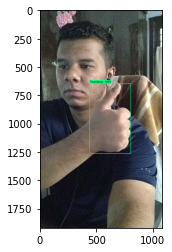

In [21]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 10. Real Time Detections from your Webcam

In [ ]:
!pip uninstall opencv-python-headless -y

In [16]:
cap = cv2.VideoCapture("http://192.168.1.5:8080/video")
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (540, 960)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 10. Freezing the Graph

In [17]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [18]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [19]:
print(command)

python Tensorflow\models\research\object_detection\exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\export


In [20]:
!{command}

2021-07-08 18:27:18.899753: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cudart64_110.dll
2021-07-08 18:27:22.804967: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library nvcuda.dll
2021-07-08 18:27:22.835785: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1650 computeCapability: 7.5
coreClock: 1.56GHz coreCount: 16 deviceMemorySize: 4.00GiB deviceMemoryBandwidth: 119.24GiB/s
2021-07-08 18:27:22.835808: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cudart64_110.dll
2021-07-08 18:27:22.841872: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cublas64_11.dll
2021-07-08 18:27:22.841897: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cublasLt64_

W0708 18:27:40.737890  2272 save_impl.py:76] Skipping full serialization of Keras layer <tensorflow.python.keras.layers.core.Lambda object at 0x000001912B62A070>, because it is not built.
W0708 18:27:40.737890  2272 save_impl.py:76] Skipping full serialization of Keras layer <object_detection.core.freezable_batch_norm.FreezableBatchNorm object at 0x000001912B62AB50>, because it is not built.
W0708 18:27:40.737890  2272 save_impl.py:76] Skipping full serialization of Keras layer <tensorflow.python.keras.layers.core.Lambda object at 0x000001910C362EB0>, because it is not built.
2021-07-08 18:27:48.475684: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
W0708 18:28:04.108484  2272 save.py:238] Found untraced functions such as WeightSharedConvolutionalBoxPredictor_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxPredictor_layer_call_fn, WeightSharedConvolutionalBoxHea

# 11. Conversion to TFJS

In [21]:
!pip install tensorflowjs

In [22]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [23]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow\workspace\models\my_ssd_mobnet\export\saved_model Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport


In [24]:
!{command}

Writing weight file Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport\model.json...


2021-07-08 18:28:48.556896: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cudart64_110.dll
2021-07-08 18:28:57.138025: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library nvcuda.dll
2021-07-08 18:28:57.173867: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1650 computeCapability: 7.5
coreClock: 1.56GHz coreCount: 16 deviceMemorySize: 4.00GiB deviceMemoryBandwidth: 119.24GiB/s
2021-07-08 18:28:57.173891: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cudart64_110.dll
2021-07-08 18:28:57.179991: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cublas64_11.dll
2021-07-08 18:28:57.180067: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cublasLt64_

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [25]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [26]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [27]:
print(command)

python Tensorflow\models\research\object_detection\export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport


In [28]:
!{command}

2021-07-08 18:29:38.715047: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cudart64_110.dll
2021-07-08 18:29:42.439140: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library nvcuda.dll
2021-07-08 18:29:42.466613: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1650 computeCapability: 7.5
coreClock: 1.56GHz coreCount: 16 deviceMemorySize: 4.00GiB deviceMemoryBandwidth: 119.24GiB/s
2021-07-08 18:29:42.466638: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cudart64_110.dll
2021-07-08 18:29:42.471949: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cublas64_11.dll
2021-07-08 18:29:42.471969: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cublasLt64_

W0708 18:29:51.920803   636 save_impl.py:76] Skipping full serialization of Keras layer <tensorflow.python.keras.layers.core.Lambda object at 0x0000020699F1B0D0>, because it is not built.
W0708 18:29:51.920803   636 save_impl.py:76] Skipping full serialization of Keras layer <object_detection.core.freezable_batch_norm.FreezableBatchNorm object at 0x00000206ACF61DF0>, because it is not built.
W0708 18:29:51.920803   636 save_impl.py:76] Skipping full serialization of Keras layer <tensorflow.python.keras.layers.core.Lambda object at 0x00000206ACF61EB0>, because it is not built.
W0708 18:29:51.920803   636 save_impl.py:76] Skipping full serialization of Keras layer <object_detection.core.freezable_batch_norm.FreezableBatchNorm object at 0x00000206ACF6D130>, because it is not built.
W0708 18:29:51.920803   636 save_impl.py:76] Skipping full serialization of Keras layer <tensorflow.python.keras.layers.core.Lambda object at 0x00000206ACF6D970>, because it is not built.
W0708 18:29:51.920803 

In [29]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [30]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [31]:
print(command)

tflite_convert --saved_model_dir=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model --output_file=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model\detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [32]:
!{command}

2021-07-08 18:30:39.515756: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cudart64_110.dll
2021-07-08 18:30:42.821503: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library nvcuda.dll
2021-07-08 18:30:42.855677: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1650 computeCapability: 7.5
coreClock: 1.56GHz coreCount: 16 deviceMemorySize: 4.00GiB deviceMemoryBandwidth: 119.24GiB/s
2021-07-08 18:30:42.855700: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cudart64_110.dll
2021-07-08 18:30:42.861237: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cublas64_11.dll
2021-07-08 18:30:42.861257: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cublasLt64_

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')